# Housing Prices - Advanced Regression Techniques

## The objective of this notebook is to predict the sale price of a house given a wide range of parameters.

# Table of Contents


1. [Preparing the data and import the tools we need](#1)
    - [Loading the dataset](#1.1)
    - [Importing the tools we need](#1.2)
    - [Features](#1.3)
    
    
2. [Exploring the data](#2)

3. [Plotting the data](#3)

4. [Data Cleaning / Feature Engineering](#4)

5. [Determine the model](#5)

6. [Hypertuning the model](#6)

7. [Feature importance](#7)

8. [Exporting](#8)

9. [Submission](#9)


<a id="1"></a>
# 1. Preparing the data and importing the tools

We will be using pandas, Matplotlib and NumPy to manipulate and analyze the data. 

In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Makes plots appear inside the notebook
%matplotlib inline 

# Models we will be using.

<a id="1.1"></a>
## 1.1 Loading the dataset

In [126]:
# Changing the settings to display all columns 

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [127]:
DATA = Path('/kaggle/input/house-prices-advanced-regression-techniques')
list(DATA.iterdir())

[PosixPath('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv'),
 PosixPath('/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt'),
 PosixPath('/kaggle/input/house-prices-advanced-regression-techniques/train.csv'),
 PosixPath('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')]

In [128]:
train = pd.read_csv(DATA/'train.csv', index_col='Id')
test = pd.read_csv(DATA/'test.csv', index_col='Id')
sampleSubmission = pd.read_csv(DATA/'sample_submission.csv')

<a id="1.2"></a>
## 1.2 importing the tools we need

We decided to have all imports in the same location, might make it harder to read for new people but makes it less verbose for us when developing.

In [129]:
from sklearn.pipeline import Pipeline
from sklearn import svm
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
import sklearn.metrics as metrics
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

<a id="1.3"></a>
## 1.3 Features

A complete explanation of the features can be found here:
https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data

# 

<a id="2"></a>
# 2. Exploring the data

In [130]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [131]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [132]:
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [133]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1461 to 2919
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          107 non-null    object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearB

We can see that there is alot of columns, and many of them contains non numerical values. There is also alot of NaN values. We will make a dataframe to see which columns have missing values, and how many unique values there are in each column. This is helpful to determine which columns we can transform from non numerical to numerical.
There also sems to be a big range of numbers, so normalization might be helpful.

In [134]:
def show_null_unique(df):
    unique_and_nulls = pd.DataFrame(df.dtypes, columns=['Dtype'])
    unique_and_nulls['Unique'] = df.nunique().values
    unique_and_nulls['Null'] = df.isnull().sum().values
    print(unique_and_nulls)
    
show_null_unique(train)

                 Dtype  Unique  Null
MSSubClass       int64      15     0
MSZoning        object       5     0
LotFrontage    float64     110   259
LotArea          int64    1073     0
Street          object       2     0
Alley           object       2  1369
LotShape        object       4     0
LandContour     object       4     0
Utilities       object       2     0
LotConfig       object       5     0
LandSlope       object       3     0
Neighborhood    object      25     0
Condition1      object       9     0
Condition2      object       8     0
BldgType        object       5     0
HouseStyle      object       8     0
OverallQual      int64      10     0
OverallCond      int64       9     0
YearBuilt        int64     112     0
YearRemodAdd     int64      61     0
RoofStyle       object       6     0
RoofMatl        object       8     0
Exterior1st     object      15     0
Exterior2nd     object      16     0
MasVnrType      object       4     8
MasVnrArea     float64     327     8
E

As we can see, there are alot of null values and object columns in the dataframe. But the reason is that these features are having alot of null values is that these houses are missing these features, like not having a fireplace. So it would be beneficial to convert these into numerical values, where 0 means missing, and having 1 and up representing "better" quality. 

We see that there is columns with 2 unique values, which probably indicates a binary column that can be replaced with 0 and 1.  

In [135]:
# A methoda to keep track of what columns that need to be converted to numerical values

def number_of_string_columns(df):
    columns = df.select_dtypes(include=["object"])
    number = 0
    string_columns = []
    for i in columns.columns:
        string_columns.append(i)
        number += 1
    print(f"Number of string columns: {number}")
    
    return string_columns
    
number_of_string_columns(train)

Number of string columns: 43


['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [136]:
# Remove rows with missing target
train = train.dropna(axis=0, subset=['SalePrice'])

#Creating Y and X
X = train.drop(columns='SalePrice', axis=1)

y = train.SalePrice

<a id="3"></a>
# 3. Plotting the data

From looking at the features and the dataframe heads, we make an assumption that the age of the house might have a big impact on the sale price. Other features that stand out:
- When the house was last remodelled.
- Exterior quality.
- Square feet.
- Features like garage, pool, and number of kitchens can also be a indicator for more expensive houses.

<AxesSubplot:ylabel='Frequency'>

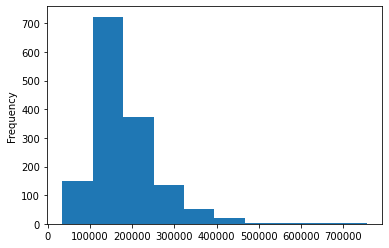

In [137]:
# Plot the frequency of sale prices.

y.plot.hist()

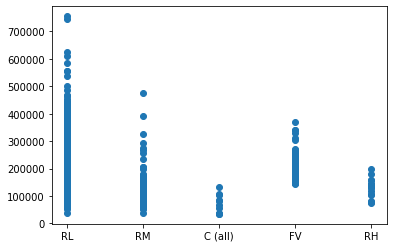

In [138]:
# From first looking at data, will do some plots that we immediately has the biggest impact on the saleprice.

# Two big factors we think can be location and age

fig, ax = plt.subplots()
ax.scatter(X["MSZoning"], y)

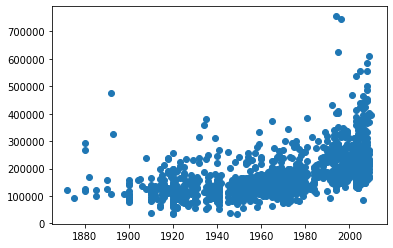

In [139]:
fig, ax = plt.subplots()
ax.scatter(X["YearBuilt"], y)

There is definitely a obvious rise in price in the newest houses, but it also seems to drop quite fast and flatten out as the house gets older.  

We  will take a bit deeper look into how the sale prices changes compared to the features that is linked to the age and year columns. We will link it up with exterior quality

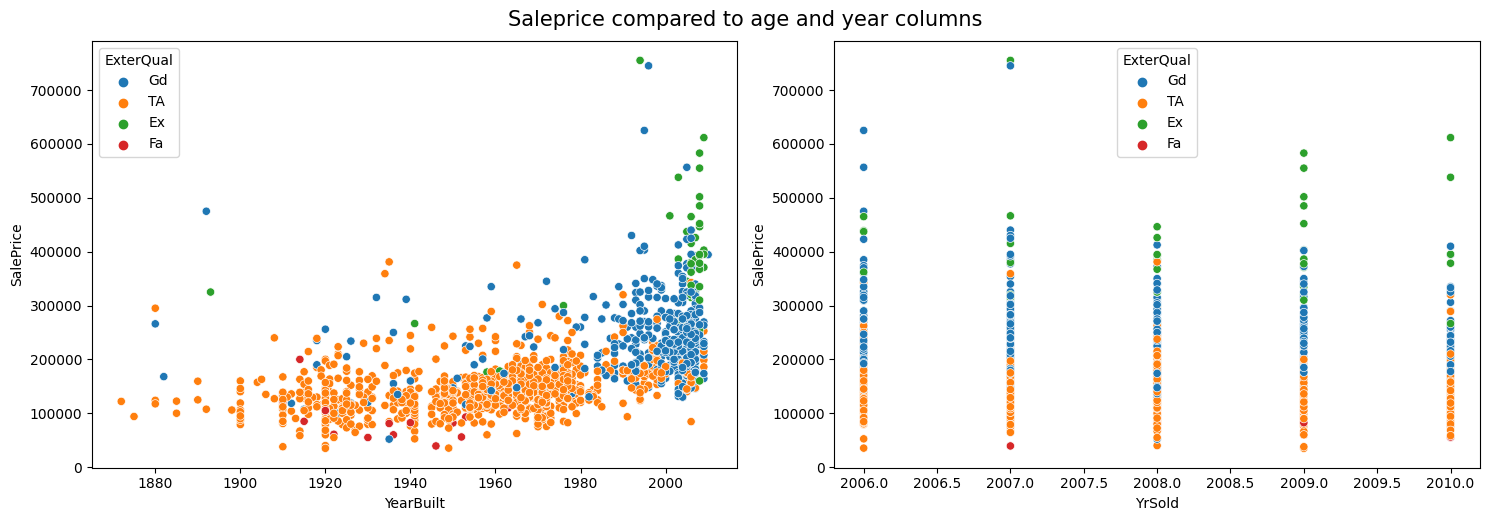

In [140]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5), dpi=100)



columns = ["YearBuilt", "YrSold"]

# scatterplot
for col,i in zip(columns, [0,1]):
    sns.scatterplot(x=X.loc[:,col], y=y, ax=ax[i], hue=X.ExterQual)

fig.tight_layout()
fig.text(0.5, 1, 'Saleprice compared to age and year columns',size=15, ha="center")
plt.show()

We will now plot all the columns with string values that are conditional

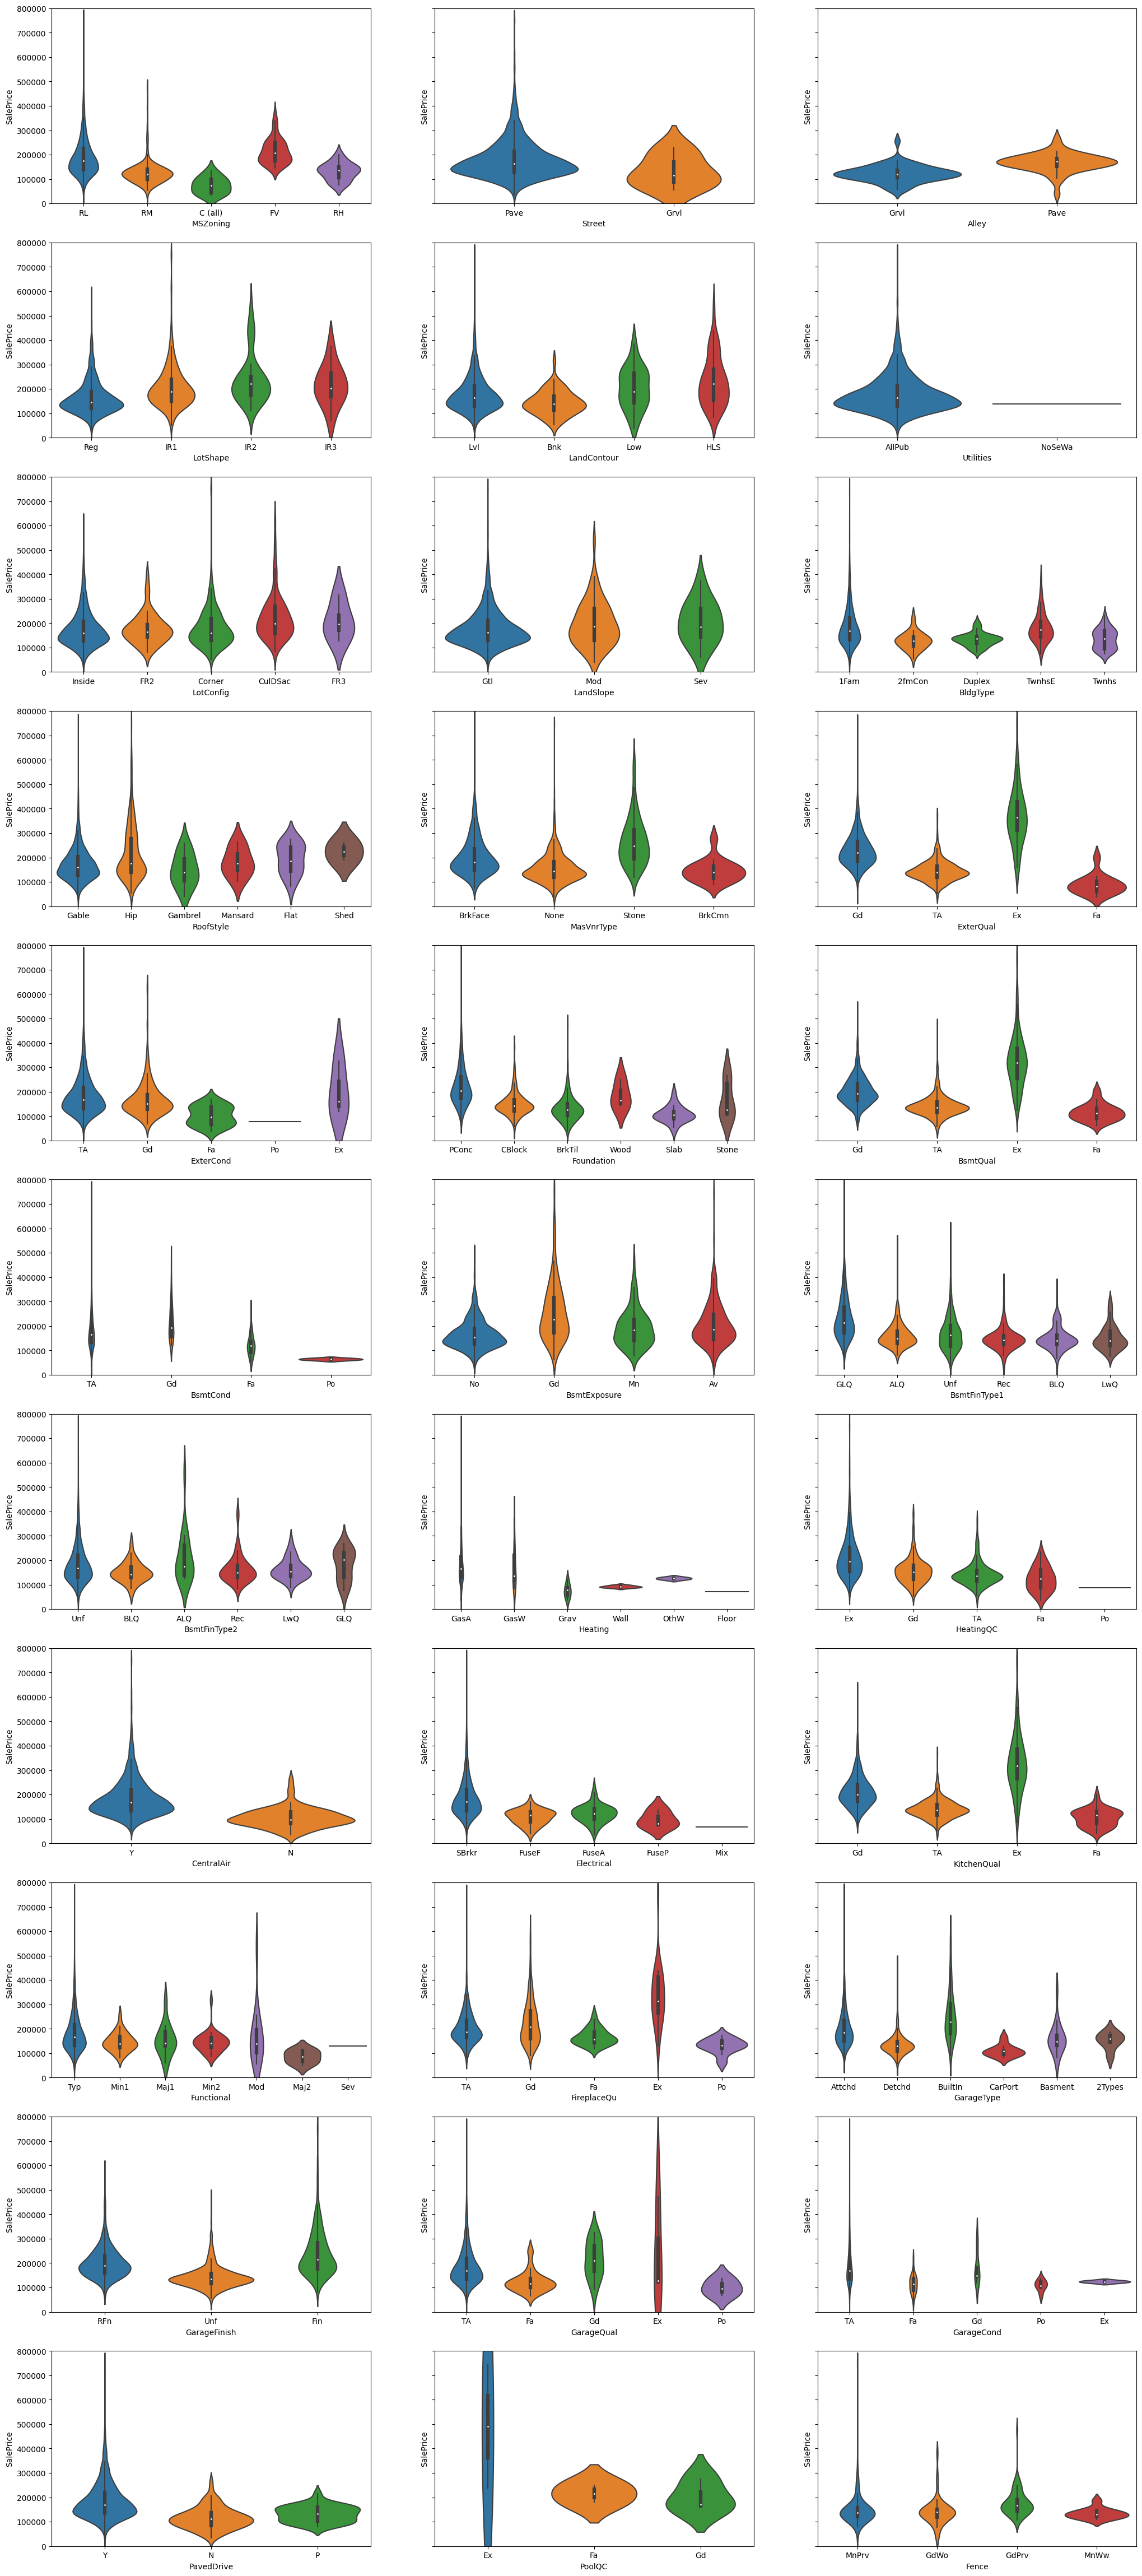

In [141]:
# Getting all columns with string values that has less than 8 unique values, gonna plot the other columns alone for readability

columns_less_than_8 = []
columns_more_than_8 = []
for i in X.select_dtypes(include=["object"]).columns:
    if len(X[i].unique()) < 8:
        columns_less_than_8.append(i)
    else:
        columns_more_than_8.append(i)
        
fig, ax = plt.subplots(int(len(columns_less_than_8) / 3), 3, figsize=(25, 60), dpi=100, sharey=True)

for column, subplot in zip(columns_less_than_8, ax.flatten()):
    # Set y axis values from 0 to 800000
    plt.ylim([0,800000])
    sns.violinplot(x=column, y=y, data=X, ax=subplot)

With these violin plots we can get a nice overview of what features has a bigger impact on the sale price, and we can also identify columns with single values (Utilities) and columns that have values with low counts (the flat lines indicate a low count of the value). 

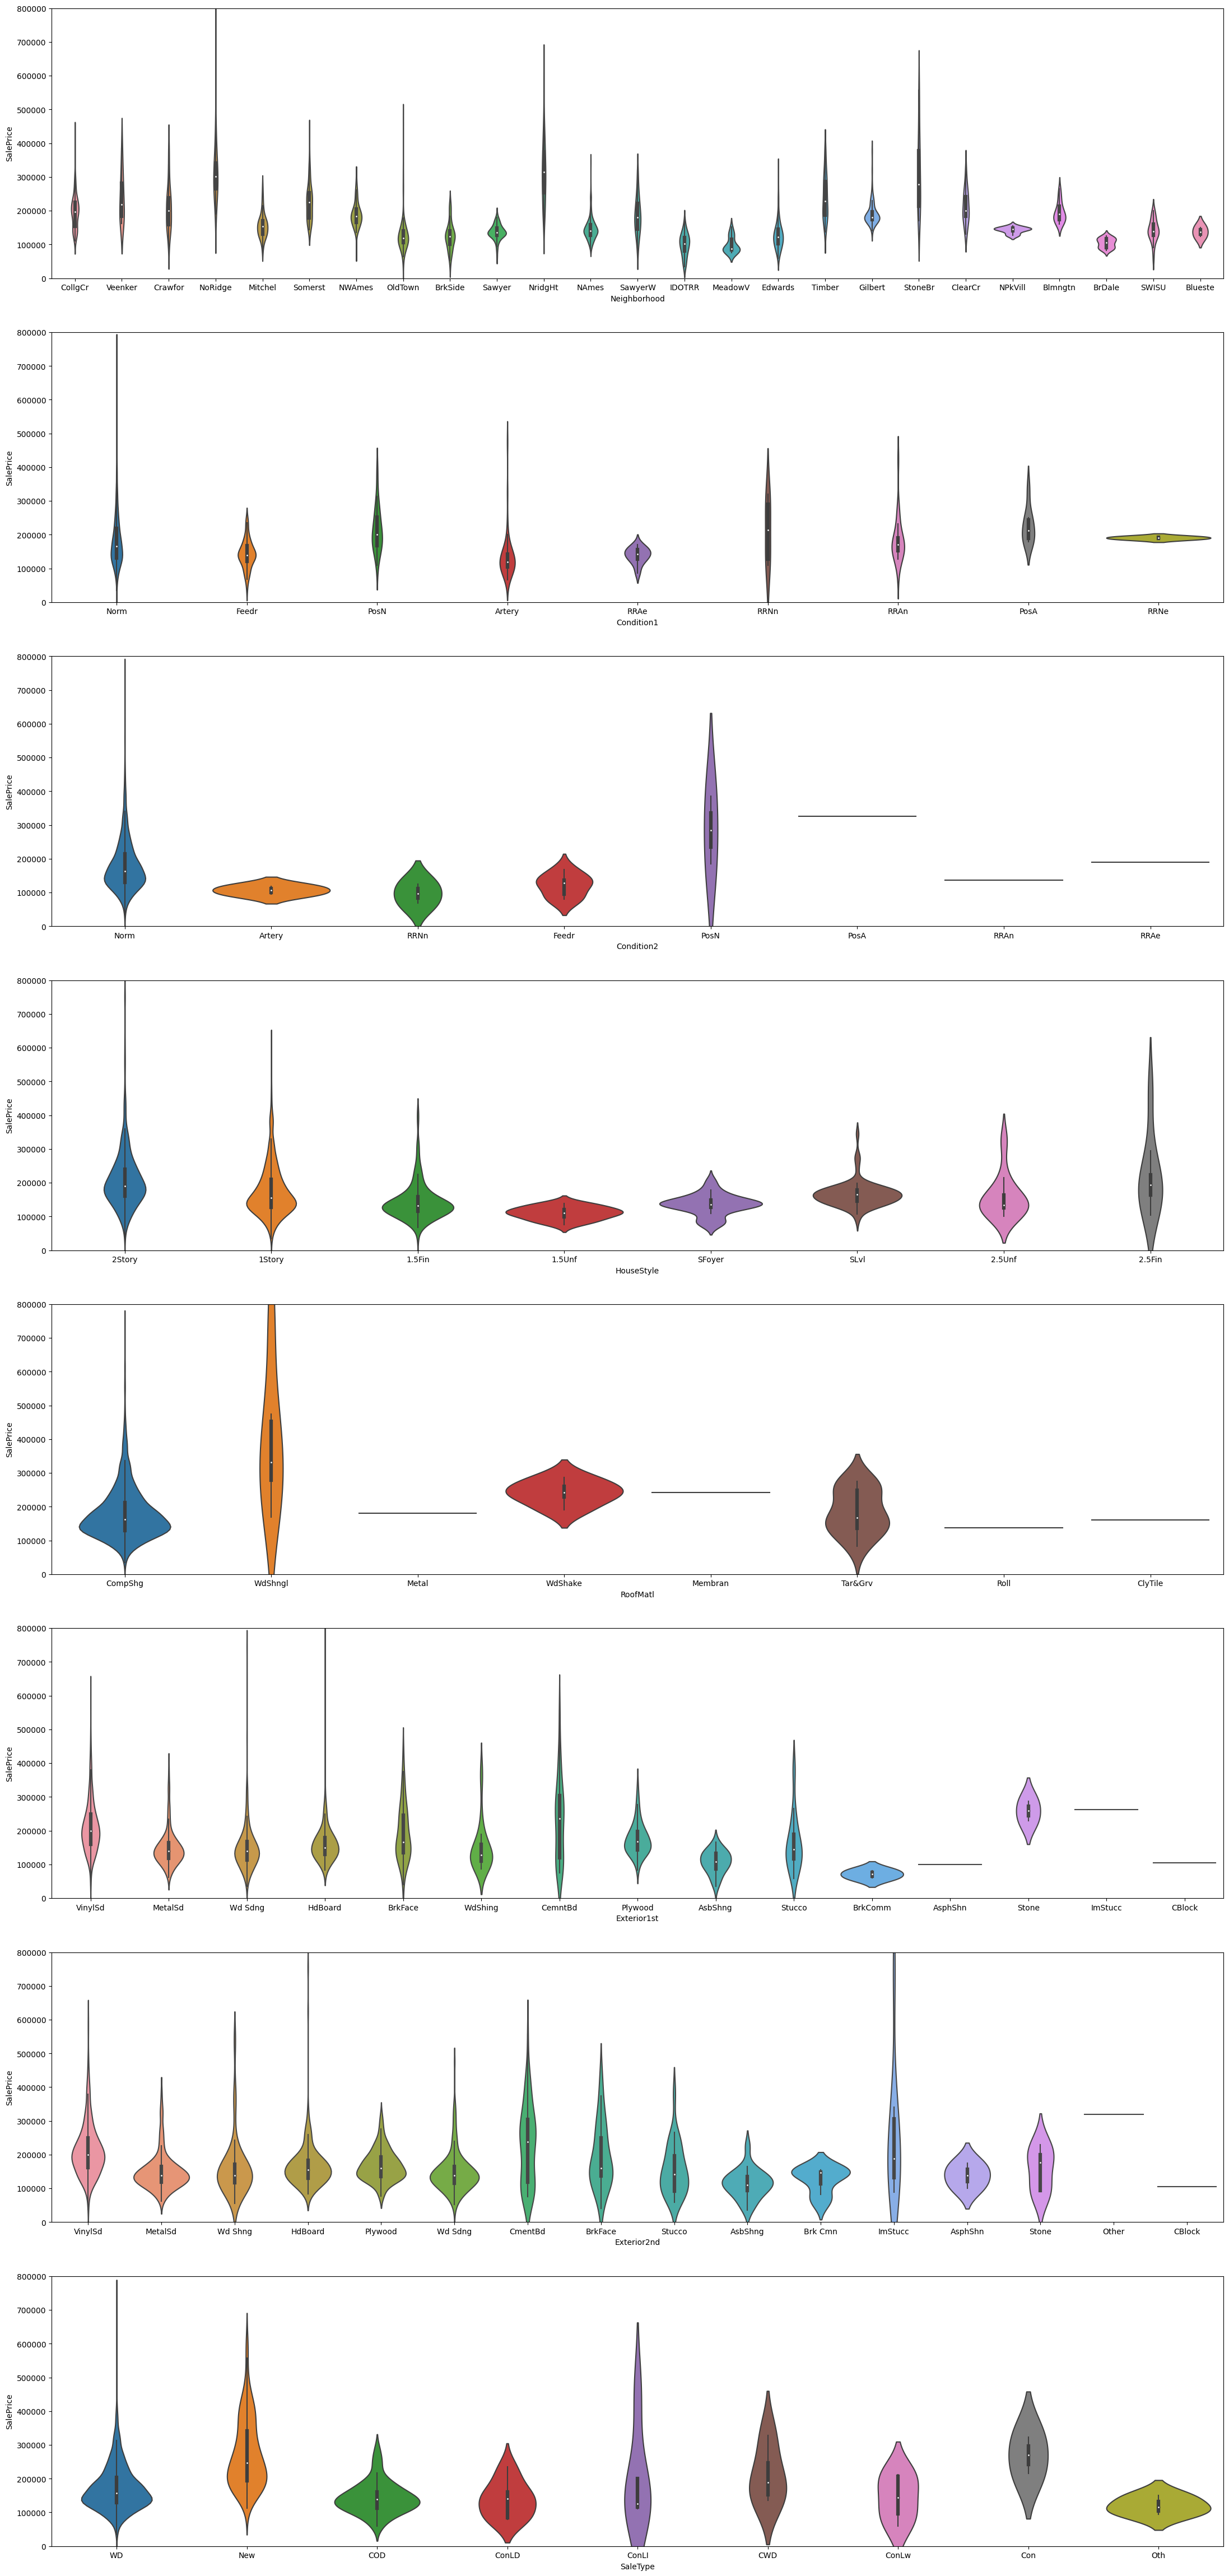

In [142]:
fig, ax = plt.subplots(int(len(columns_more_than_8) / 1), 1, figsize=(27, 60), dpi=100, sharey=True)

for column, subplot in zip(columns_more_than_8, ax.flatten()):
    plt.ylim([0,800000])
    sns.violinplot(x=column, y=y, data=X, ax=subplot)

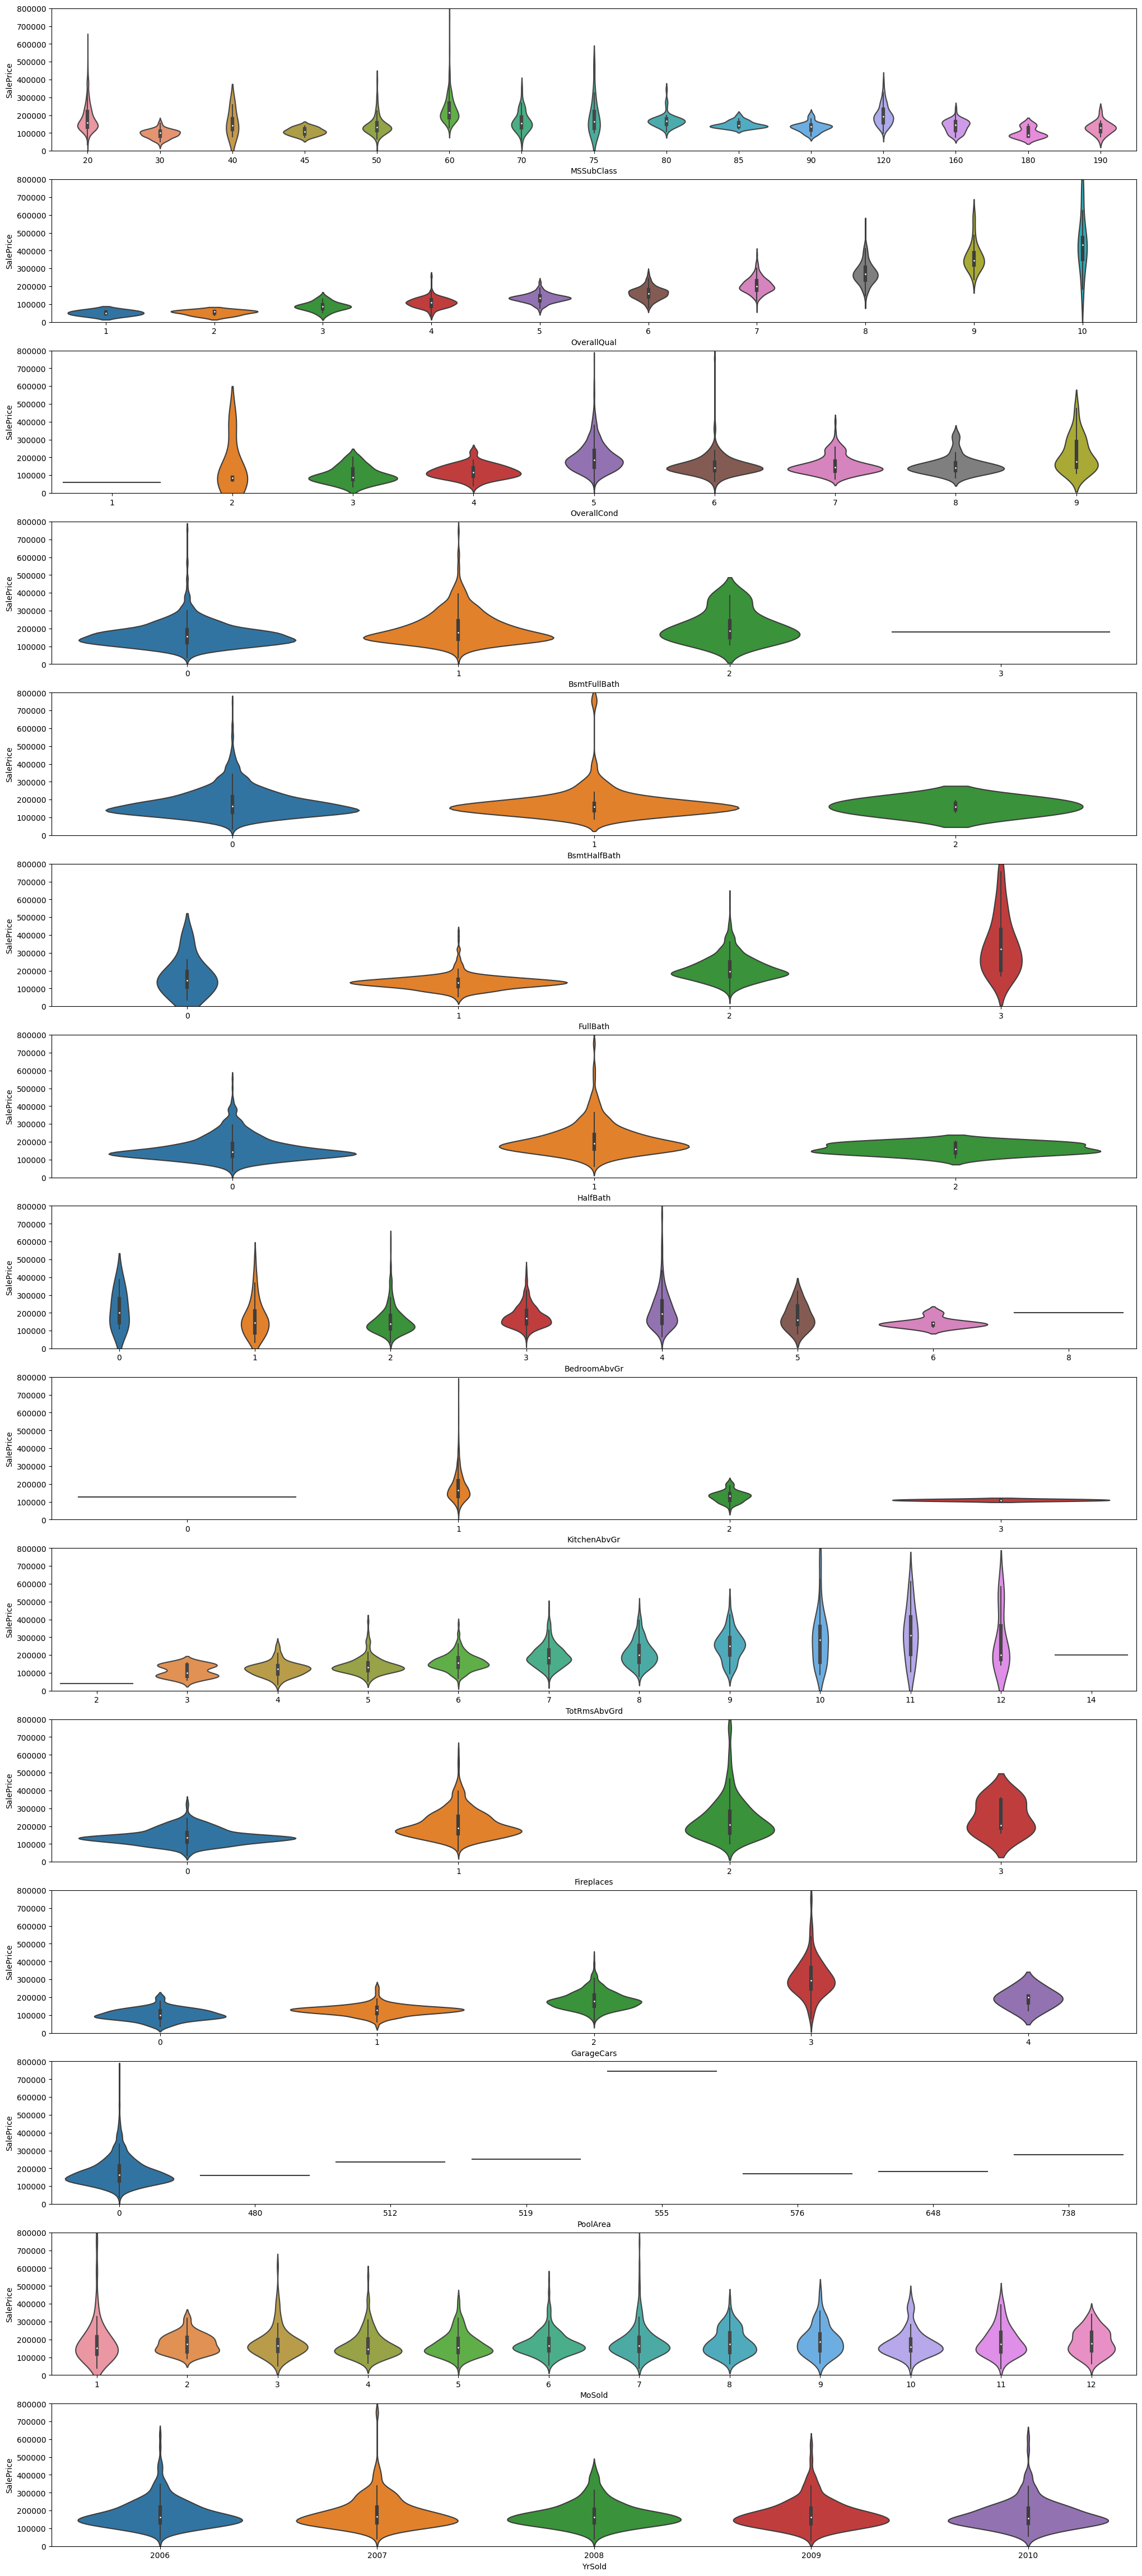

In [143]:
# We also wanted to take a look at some violin plots with columns of int values, but will only include those with few unique values.

columns_less_than_16 = []

for i in X.select_dtypes(include=["int64"]).columns:
    if len(X[i].unique()) < 16:
        columns_less_than_16.append(i)
        
fig, ax = plt.subplots(int(len(columns_less_than_16) / 1), 1, figsize=(25, 60), dpi=100, sharey=True)

for column, subplot in zip(columns_less_than_16, ax.flatten()):
    plt.ylim([0,800000])
    sns.violinplot(x=column, y=y, data=X, ax=subplot)

<AxesSubplot:>

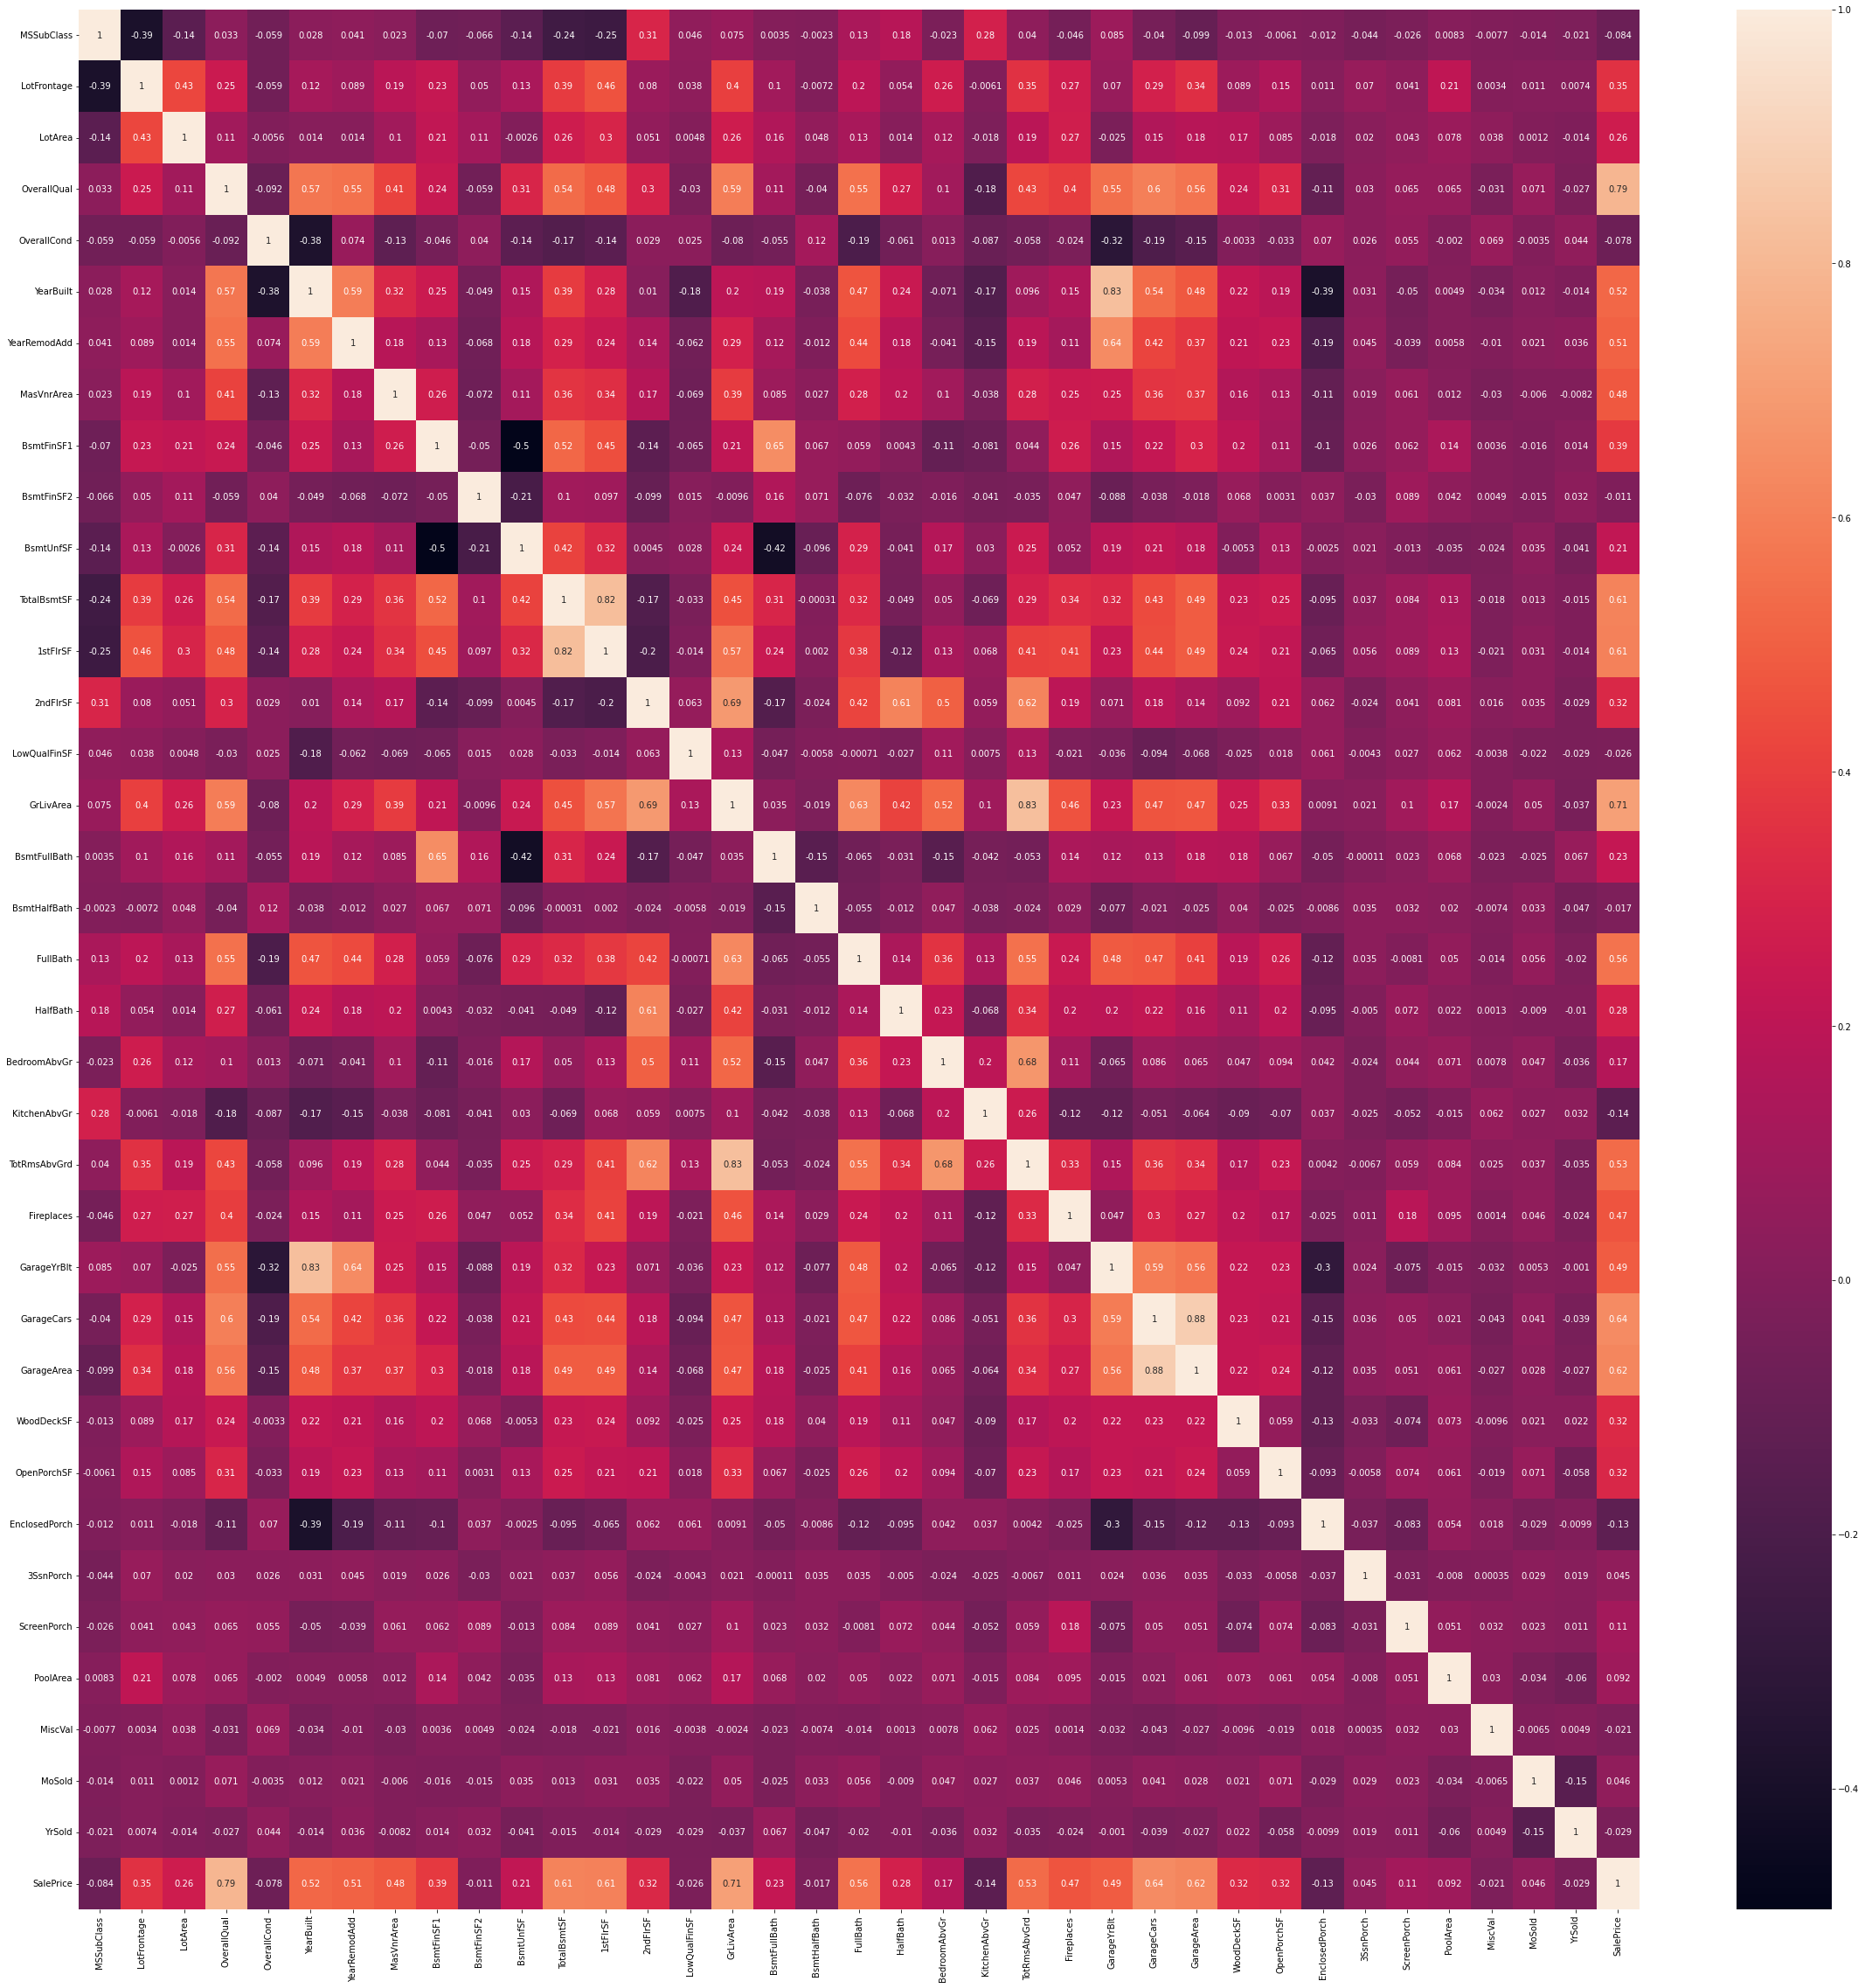

In [144]:
# https://www.analyticsvidhya.com/blog/2020/10/feature-selection-techniques-in-machine-learning/

cor = train.corr()

plt.figure(figsize = (40,40))
sns.heatmap(cor, annot = True)

We can see here that the Overral quality feature is most correlating with the sale price, among other things. 

Summary of analysis:
    
Instead of making a set list of todos at of what we are gonna to do in terms of changing the dataset at this point, we will rather dive into the code, do some quick work to get a the dataset ready for modelling, test out a few models and get a score. And later on we will come back to the plots to see if there are more work that can be done. 
Another pro for doing this is that we can maybe use feature selection to determine what features are doing the most work on the models

But in general the things that we want to do is:
- Fix string columns
- Try to create new columns and/or merge two or more existing columns.
- Fix NaN values
- Drop non important columns by looking at unique values, missing values and correlation

# 

<a id="4"></a>
# 4. Data Cleaning / Feature engineering

<a id="4.1"></a>
## 4.1 Replacing quality and condition column categories with numbers

There are some categories which have a indication of the quality or condition, and these columns share some representation of quality, like: 
- "Gd" which means good.
- "Ex" which means excellent. 
- "Po" which means poor.
- "LwQ" whicm means low quality.

After manually looking through the feature set and its values, we have indentified more columns that we want to change, one of the unique values in these will
be added to the if check in the code block below to insert them into the column (instead of manually adding them with extra lines of code).

We are gonna find these columns and replace them with numbers from 0 (where 0 means worst condition).

In [145]:
test_1 = test

string_columns = X.select_dtypes(include=["object"])

quality_columns = []

for i in string_columns:
    if ("GD" in X[i].unique()) or ("Ex" in X[i].unique()) or ("Po" in X[i].unique()) or ("LwQ" in X[i].unique()) or ("Reg" in X[i].unique()) or ("Unf" in X[i].unique()) or ("Typ" in X[i].unique()):
        quality_columns.append(i)
        
# Some of these categories contain NaN values, we will replace this with a string "NA"
X.loc[:,quality_columns] = X.loc[:,quality_columns].fillna('NA')
test_1.loc[:,quality_columns] = test_1.loc[:,quality_columns].fillna('NA')

print("Columns with quality or conditional values:\n") 
nmbr_of_columns = 0
for i in quality_columns:
    nmbr_of_columns += 1
    print(f"{i} : {X[i].unique()}")
    
print(f"\nNumber of columns: {nmbr_of_columns}")

Columns with quality or conditional values:

LotShape : ['Reg' 'IR1' 'IR2' 'IR3']
ExterQual : ['Gd' 'TA' 'Ex' 'Fa']
ExterCond : ['TA' 'Gd' 'Fa' 'Po' 'Ex']
BsmtQual : ['Gd' 'TA' 'Ex' 'NA' 'Fa']
BsmtCond : ['TA' 'Gd' 'NA' 'Fa' 'Po']
BsmtFinType1 : ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' 'NA' 'LwQ']
BsmtFinType2 : ['Unf' 'BLQ' 'NA' 'ALQ' 'Rec' 'LwQ' 'GLQ']
HeatingQC : ['Ex' 'Gd' 'TA' 'Fa' 'Po']
KitchenQual : ['Gd' 'TA' 'Ex' 'Fa']
Functional : ['Typ' 'Min1' 'Maj1' 'Min2' 'Mod' 'Maj2' 'Sev']
FireplaceQu : ['NA' 'TA' 'Gd' 'Fa' 'Ex' 'Po']
GarageFinish : ['RFn' 'Unf' 'Fin' 'NA']
GarageQual : ['TA' 'Fa' 'Gd' 'NA' 'Ex' 'Po']
GarageCond : ['TA' 'Fa' 'NA' 'Gd' 'Po' 'Ex']
PoolQC : ['NA' 'Ex' 'Fa' 'Gd']

Number of columns: 15


Now we can replace these column values with numbers, and since some of these contains the same unique values we can edit some of them together. 

This could have been done with Ordinal encoding, but by doing it manually we can more easily see what is going on.

In [146]:
columns1 = ["FireplaceQu", "GarageQual", "GarageCond"]
X.loc[:,columns1] = X.loc[:,columns1].replace(['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], [0,1,2,3,4,5])
test_1.loc[:,columns1] = test_1.loc[:,columns1].replace(['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], [0,1,2,3,4,5])


columns2 = ["PoolQC"]
X.loc[:,columns2] = X.loc[:,columns2].replace(['NA', 'Fa', 'Gd', 'Ex'], [0,1,2,3])
test_1.loc[:,columns2] = test_1.loc[:,columns2].replace(['NA', 'Fa', 'Gd', 'Ex'], [0,1,2,3])


columns3 = ["KitchenQual", "ExterQual"]
X.loc[:,columns3] = X.loc[:,columns3].replace(['NA', 'Fa', 'TA', 'Gd', 'Ex'], [0,1,2,3,4])
test_1.loc[:,columns3] = test_1.loc[:,columns3].replace(['NA', 'Fa', 'TA', 'Gd', 'Ex'], [0,1,2,3,4])


columns4 = ["HeatingQC", "ExterCond"]
X.loc[:,columns4] = X.loc[:,columns4].replace(['Po', 'Fa', 'TA', 'Gd', 'Ex'], [0,1,2,3,4])
test_1.loc[:,columns4] = test_1.loc[:,columns4].replace(['Po', 'Fa', 'TA', 'Gd', 'Ex'], [0,1,2,3,4])


columns5 = ["BsmtFinType1", "BsmtFinType2"]
X.loc[:,columns5] = X.loc[:,columns5].replace(['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'], [0,1,2,3,4,5,6])
test_1.loc[:,columns5] = test_1.loc[:,columns5].replace(['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'], [0,1,2,3,4,5,6])


columns6 = ["BsmtCond"]
X.loc[:,columns6] = X.loc[:,columns6].replace(['NA', 'Po', 'Fa', 'TA', 'Gd'], [0,1,2,3,4])
test_1.loc[:,columns6] = test_1.loc[:,columns6].replace(['NA', 'Po', 'Fa', 'TA', 'Gd'], [0,1,2,3,4])

columns7 = ["BsmtQual"]
X.loc[:,columns7] = X.loc[:,columns7].replace(['NA', 'Fa', 'TA', 'Gd', 'Ex'], [0,1,2,3,4])
test_1.loc[:,columns7] = test_1.loc[:,columns7].replace(['NA', 'Fa', 'TA', 'Gd', 'Ex'], [0,1,2,3,4])

columns8 = ["LotShape"]
X.loc[:,columns8] = X.loc[:,columns8].replace(['Reg', 'IR1', 'IR2', 'IR3'], [0,1,2,3])
test_1.loc[:,columns8] = test_1.loc[:,columns8].replace(['Reg', 'IR1', 'IR2', 'IR3'], [0,1,2,3])


columns9 = ["GarageFinish"]
X.loc[:,columns9] = X.loc[:,columns9].replace(['NA', 'Unf', 'RFn', 'Fin' ], [0,1,2,3])
test_1.loc[:,columns9] = test_1.loc[:,columns9].replace(['NA', 'Unf', 'RFn', 'Fin' ], [0,1,2,3])


columns10 = ["Functional"]
X.loc[:,columns10] = X.loc[:,columns10].replace(['NA', "Sal", "Sev", "Maj2", "Maj1", "Mod", "Min2", "Min1", "Typ"], [0,1,2,3,4,5,6,7,8])
test_1.loc[:,columns10] = test_1.loc[:,columns10].replace(['NA', "Sal", "Sev", "Maj2", "Maj1", "Mod", "Min2", "Min1", "Typ"], [0,1,2,3,4,5,6,7,8])

columns11 = ["PavedDrive"]
X.loc[:,columns11] = X.loc[:,columns11].replace(["N", "P", "Y"], [0,1,2])
test_1.loc[:,columns11] = test_1.loc[:,columns11].replace(["N", "P", "Y"], [0,1,2])

In [147]:
print(number_of_string_columns(X))
print(number_of_string_columns(test_1))

Number of string columns: 27
['MSZoning', 'Street', 'Alley', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'BsmtExposure', 'Heating', 'CentralAir', 'Electrical', 'GarageType', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
Number of string columns: 27
['MSZoning', 'Street', 'Alley', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'BsmtExposure', 'Heating', 'CentralAir', 'Electrical', 'GarageType', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


Now we are down to 27!

## 4.2 Detecting columns with low frequency values

We have fixed the ordinal columns (columns that have ordered values) and have left to convert unordered string values. 

To be able to analyze important features after modelling, the plan is to use dummies to convert some these columns. The problem with using dummies is that alot of columns  are generated.
One solution to this is to detect rare values and convert them to "other". This will decrease the number of columns, and potentially make the model better. 

Source: https://medium.com/gett-engineering/handling-rare-categorical-values-in-pandas-d1e3f17475f0

In [148]:
columns = number_of_string_columns(X)

for i in columns:
    print("*" * 60)
    print(f"Column: {i} ")
    print(X[i].value_counts(normalize=True, ascending=False))
    print("\n")

Number of string columns: 27
************************************************************
Column: MSZoning 
RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
Name: MSZoning, dtype: float64


************************************************************
Column: Street 
Pave    0.99589
Grvl    0.00411
Name: Street, dtype: float64


************************************************************
Column: Alley 
Grvl    0.549451
Pave    0.450549
Name: Alley, dtype: float64


************************************************************
Column: LandContour 
Lvl    0.897945
Bnk    0.043151
HLS    0.034247
Low    0.024658
Name: LandContour, dtype: float64


************************************************************
Column: Utilities 
AllPub    0.999315
NoSeWa    0.000685
Name: Utilities, dtype: float64


************************************************************
Column: LotConfig 
Inside     0.720548
Corner     0.180137
CulDSac    0.064384
FR2  

As we can see there are many values that have very low representation in the dataset. We will convert these values to "other". The treshold for getting put in the "other" category will be if the value is represented less than 1 %.

## 4.3 dropping columns

First we drop the columns that mostly contains 1 value, the Utilities and Street column.

After modelling and looking at feature importance we also decided to remove following columns:
- MiscFeature (low importance and alot of missing values).
- MiscVal (low importance and generaly vague feature).

In [149]:
X = X.drop(columns="Utilities", axis=1)
test_1 = test_1.drop(columns="Utilities", axis=1)

X = X.drop(columns="Street", axis=1)
test_1 = test_1.drop(columns="Street", axis=1)

X = X.drop(columns="MiscFeature", axis=1)
test_1 = test_1.drop(columns="MiscFeature", axis=1)

X = X.drop(columns="MiscVal", axis=1)
test_1 = test_1.drop(columns="MiscVal", axis=1)

## 4.4 Converting low frequency values to "other"

As discussed in 3.2, we will map the values that occur rarely together in a value called "other".

In [150]:
columns = number_of_string_columns(X)

for column in columns:
    X[column] = X[column].mask(X[column].map(X[column].value_counts(normalize=True)) < 0.01, 'Other')
    test_1[column] = test_1[column].mask(test_1[column].map(test_1[column].value_counts(normalize=True)) < 0.01, 'Other')


Number of string columns: 24


## 4.5 Convert unordered columns to numerical

Here we found out that we have quite a few options:
- One Hot Encoding
    - This solution gave us quite good scores, but we would end up with a matrix where the columns are all numbers, and couldnt convert them back to the correct names. This meant that it was impossible to analyze after modelling which features had the biggest impact. There was most likely a way to do this, but we couldnt figure it out. In addition, since one hot encoding creates a new column for each value we ended up with a very big dataframe.
    
- Label Encoding
    - Label encoding is an easy solution where every value gets their own represenation in form of a number in the same column, but it can lead to confusion by making the model think that there are relations between the different numbers.

- Dummies
    - Also easy and good, every value gets their own column with a binary value in the column which represents if the value has occured. But as with one hot encoding you end up with more columns. 
    
    
We  ended going for Label encoding even though it produced a little bit worse result, the reason being that we want to see what features matter. In a production setting where performance is the only important thing, One hot encoder would be the best choice. 
Pandas Categorical functionality will be the way to label encode the remaining columns.

We used One hot encoding early in the process to get a result and will include this in the notebook, but it is not being used in the final version.

In [151]:
# Using OnehotEncoder to deal with string/non numerical values
X_1 = X
encoder = OneHotEncoder(sparse=False, handle_unknown="ignore")

# Getting all columns with non numerical values
non_numerical_train = list(X_1.select_dtypes(include=['object']).columns)
print(len(non_numerical_train))


one_hot_encoder_transformer = ColumnTransformer([("one_hot", 
                                 encoder,
                                 non_numerical_train)],
                               remainder="passthrough")

X_1 = pd.DataFrame(one_hot_encoder_transformer.fit_transform(X_1))
test_onehot = pd.DataFrame(one_hot_encoder_transformer.transform(test_1)) 

X_1.shape, test_onehot.shape, y.shape

24


((1460, 185), (1459, 185), (1460,))

We end up with alot of columns

In [152]:
columns = number_of_string_columns(X)
  
for i in columns:
    X[i]= pd.Categorical(X[i]).codes
    test_1[i] = pd.Categorical(test_1[i]).codes

X.shape, test_1.shape

Number of string columns: 24


((1460, 75), (1459, 75))

## 4.6 Fixing columns with nan values

In [153]:
# Found from stackoverflow: https://stackoverflow.com/questions/47414848/pandas-select-all-columns-without-nan

# Getting all columns with nan values and inserting newValue, in this case 0.

def rmissingvaluecol(dff,threshold, newValue):
    l = []
    l = list(dff.drop(dff.loc[:,list((100*(dff.isnull().sum()/len(dff.index))>=threshold))].columns, 1).columns.values)
    print("# Columns having more than %s percent missing values:"%threshold,(dff.shape[1] - len(l)))
    columns = list(set(list((dff.columns.values))) - set(l))
    
    for i in columns: 
        dff[i].fillna(newValue, inplace=True)
    
rmissingvaluecol(X,0.01, 0)
#rmissingvaluecol(X_final,0.01, 0)
#rmissingvaluecol(test_1,0.01, 0)


# Columns having more than 0.01 percent missing values: 3


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  import sys


# 

<a id="5"></a>
# 5. Determine the model

## 5.1 Scaling and transformation

We have not discussed normalization, scaling or transformation until now. The scale of the different values in the dataset is not very high, so any attempts on using Standard scaler or Min max scaler has lead to a decrease in performance. The only column that needs to be addressed is the Saleprice column. This column varies alot and as we will see in the plot below, it has a skewed distribution. We will fix this by using logarithmic transformation on the Saleprice. 

Source: https://reinec.medium.com/my-notes-handling-skewed-data-5984de303725

However we will not use logarithmic transformation when testing different models, because it affects the scores we are using dramatically. 

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


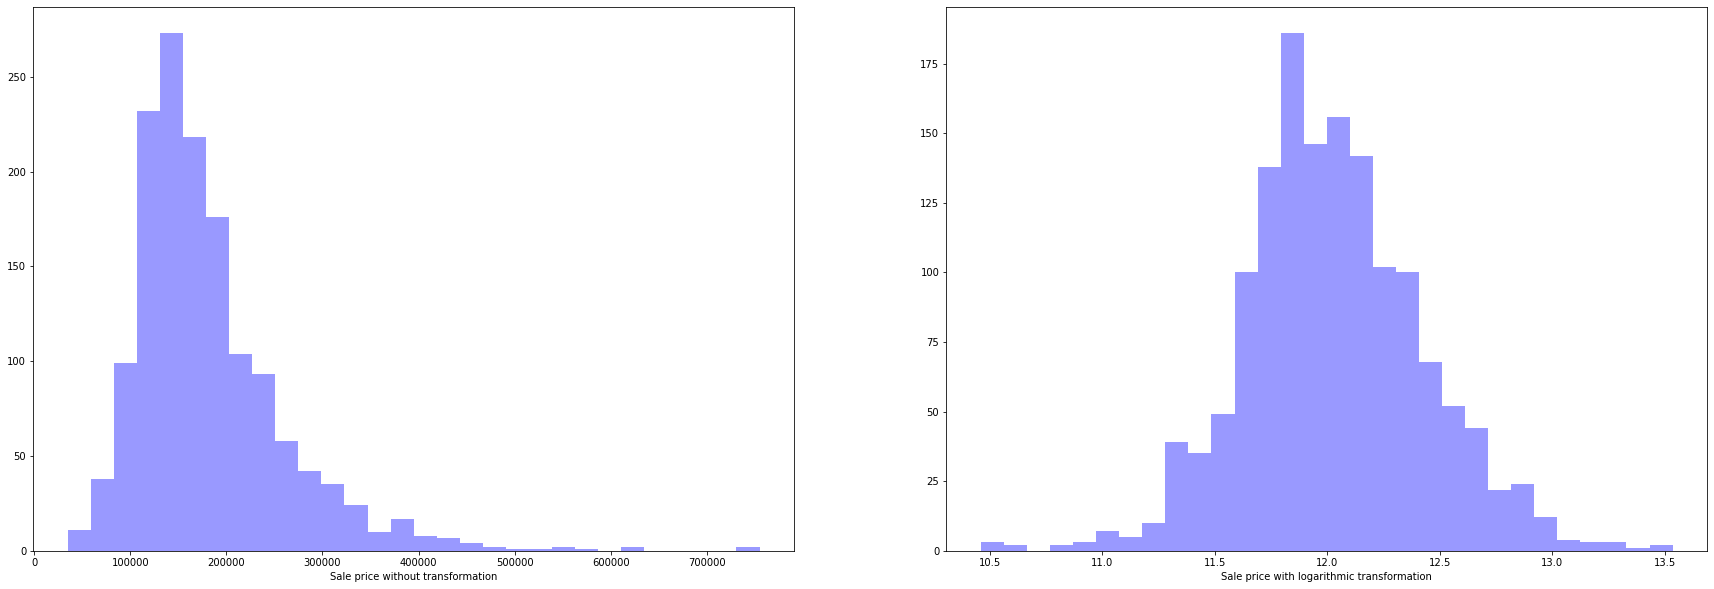

In [154]:
fig, ax =plt.subplots(1,2, figsize=(30,10))
sns.distplot(train['SalePrice'], kde = False, color ='blue', bins = 30, ax=ax[0], axlabel="Sale price without transformation")
sns.distplot(np.log(train['SalePrice']), kde = False, color ='blue', bins = 30, ax=ax[1], axlabel="Sale price with logarithmic transformation")
fig.show()

# 

## 5.2 Testing models

Mean Absolute Error and R2 score will be the metric to test the models on. 

In [155]:
from sklearn.metrics import mean_squared_error as mse
# Creating a function that can compare different datasets, in this case i will compare the simple onehotencoder solution to the more manual approach
def test_dataset(data, label):
    
    print(f"Model scores for data: {label}")
    
    # Splitting the data
    X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2 , random_state=1)

    
    # XGB Regressor
    
    xgb = XGBRegressor(eval_metric="rmse")

    xgb.fit(X_train, y_train)

    Y_pred =  xgb.predict(X_test)

    print("--------------------------------------------")
    print("XGB Regressor scores:")
    print('Mean Absolute Error: ', mean_absolute_error(Y_pred, y_test))
    print('R2 score: ', r2_score(y_test, Y_pred))

    
    # Random Forest 
    
    RFR_pipeline = Pipeline([
    ("RFR Regression", RandomForestRegressor())
    ])

    RFR_pipeline.fit(X_train, y_train)

    Y_pred = RFR_pipeline.predict(X_test)
    print("--------------------------------------------")
    print("Random Forest Regressor scores:")
    print('Mean Absolute Error: ', mean_absolute_error(Y_pred, y_test))
    print('R2 score: ', r2_score(y_test, Y_pred))
    
    # SGD Regressor 
    
    SGD_pipeline = Pipeline([
    ("MinMax Scaling", MinMaxScaler()),
    ("SGD Regression", SGDRegressor())
    ])


    SGD_pipeline.fit(X_train, y_train)

    Y_pred = SGD_pipeline.predict(X_test)
    print("--------------------------------------------")
    print("SGD_Regressor scores:")
    print('Mean Absolute Error: ', mean_absolute_error(Y_pred, y_test))
    print('R2 score: ', r2_score(y_test, Y_pred))
    
    # Ridge regression
    
    alpha = 0.1

    Ridge_pipeline = Pipeline([
        ("Ridge:", Ridge(alpha=alpha))
    ])

    Ridge_pipeline.fit(X_train, y_train)

    Y_pred = Ridge_pipeline.predict(X_test)

    print("--------------------------------------------")
    print("Ridge Regression scores with alpha: " + str(alpha))
    print('Mean Absolute Error: ', mean_absolute_error(Y_pred, y_test))
    print('R2 score: ', r2_score(y_test, Y_pred))
    
    print("--------------------------------------------")
    
    lasso = Lasso(alpha=0.1)
    
    lasso.fit(X_train, y_train)

    Y_pred = lasso.predict(X_test)

    print("--------------------------------------------")
    print("Lasso scores with alpha: ")
    print('Mean Absolute Error: ', mean_absolute_error(Y_pred, y_test))
    print('R2 score: ', r2_score(y_test, Y_pred))
    
    print("--------------------------------------------")
    print("\n\n")
            

#test_dataset(X, "OneHotEncoder Dataset")
test_dataset(X, "Manual")

Model scores for data: Manual
--------------------------------------------
XGB Regressor scores:
Mean Absolute Error:  16042.824887628425
R2 score:  0.8820479039568886
--------------------------------------------
Random Forest Regressor scores:
Mean Absolute Error:  16000.651130136986
R2 score:  0.8962473347070121
--------------------------------------------
SGD_Regressor scores:
Mean Absolute Error:  19829.49965571533
R2 score:  0.8262964017115605
--------------------------------------------
Ridge Regression scores with alpha: 0.1
Mean Absolute Error:  19671.751922267147
R2 score:  0.7922435742692857
--------------------------------------------
--------------------------------------------
Lasso scores with alpha: 
Mean Absolute Error:  19707.130373818545
R2 score:  0.7904032930755628
--------------------------------------------





Both XGB and Random forest are doing good so we decided to move forward with both of these for hypertuning.

# 

<a id="6"></a>
# 6. Hypertuning the models

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state=1)

### XGBRegressor and Grid Search CV
This grid search seup was discovered online and modified slightly, however we forgot to save the source and didn't manage to find it again.

In [157]:
xgb = XGBRegressor(eval_metric='rmse')

param_grid = [
    {'subsample': [0.5], 'n_estimators': [1400], 
     'max_depth': [5], 'learning_rate': [0.02],
     'colsample_bytree': [0.4], 'colsample_bylevel': [0.5],
     'reg_alpha':[1], 'reg_lambda': [1], 'min_child_weight':[2]}
]

grid_search = GridSearchCV(xgb, param_grid, cv=3, verbose=1, scoring='neg_root_mean_squared_error')

# First fitting final model with same data to compare scores.
grid_search.fit(X_train, y_train)

Y_pred =  grid_search.predict(X_test)

print("--------------------------------------------")
print("XGB Regressor with GridSearchCV scores:")
print('Mean Absolute Error: ', mean_absolute_error(Y_pred, y_test))
print('R2 score: ', r2_score(y_test, Y_pred))

Fitting 3 folds for each of 1 candidates, totalling 3 fits
--------------------------------------------
XGB Regressor scores:
Mean Absolute Error:  13924.877996575342
R2 score:  0.9199113785631685


# 

### Random Forest regresor and Randomized Search CV

This particular setup was found here: 
https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74


In [158]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 3, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Y_pred =  rf_random.predict(X_test)

print("--------------------------------------------")
print("Random Forest with RandomizedSearchCV scores:")
print('Mean Absolute Error: ', mean_absolute_error(Y_pred, y_test))
print('R2 score: ', r2_score(y_test, Y_pred))

Fitting 3 folds for each of 3 candidates, totalling 9 fits
--------------------------------------------
XGB Regressor scores:
Mean Absolute Error:  16569.05090490015
R2 score:  0.8625794312493283


The XGB regressor with Grid search CV had the best scores so we will choose this as the final model.

We will now fit it on all training data and logarithmic transform the Saleprice.

In [159]:
final_model = grid_search

In [160]:
final_model.fit(X, np.log(y));

Fitting 3 folds for each of 1 candidates, totalling 3 fits


### Look for overfitting

By using Root Mean Squared Log Error and Mean Square Error on both the training and validation set we can check for overfitting. We have ruled out underfitting since the different models are performing well on the training set. Overfitting means that the score on the training data is much better than the score on the test data, so we want these error metrics below to be similar or close.

In [161]:
print("RMSLE on training data: ",round(-final_model.score(X, np.log(y)),4))
print("RMSLE on validation data: ",round(-final_model.best_score_,4))
print("\n")
print("MSE on training data: ",mse(final_model.predict(X_train), y_train, squared=True) * 10000000)
print("MSE on validation data:",mse(final_model.predict(X_test), y_test, squared=True) * 10000000)

RMSLE on training data:  0.0721
RMSLE on validation data:  0.1259


MSE on training data:  3.928765517601621e+17
MSE on validation data: 3.8023679278313645e+17
3.928765517601621e+17 3.8023679278313645e+17


We conclude that the model is not overfitted.

# 

<a id="7"></a>
# 7. Feature importance plotting

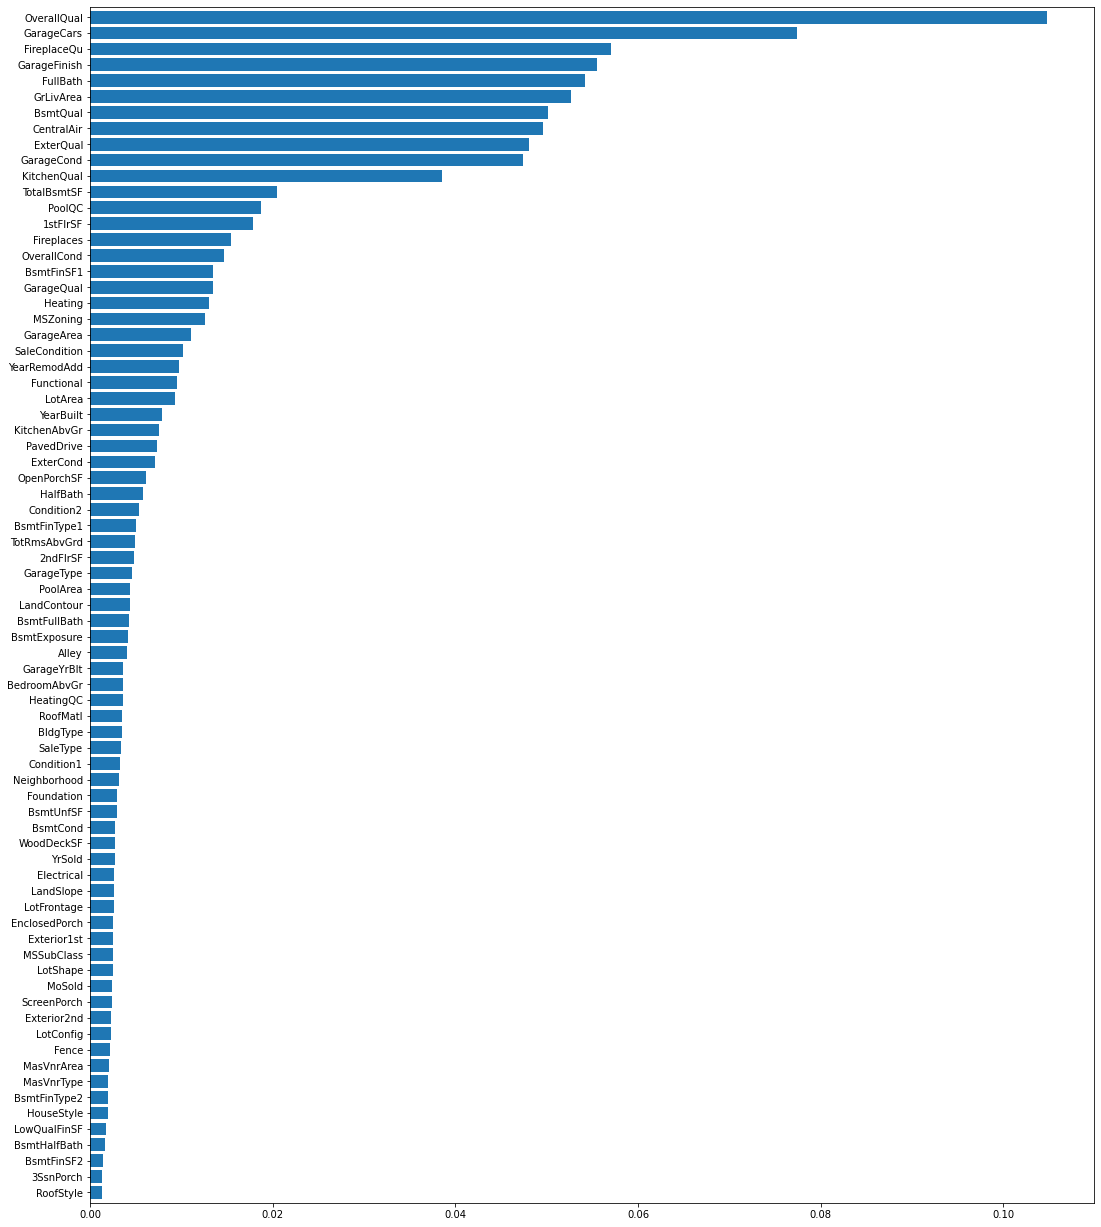

In [162]:
feature_importance = grid_search.best_estimator_.feature_importances_
feature_importance_sorted = pd.Series(feature_importance,X.columns).sort_values(ascending=True)

# Plot horizaontal bar plot
plt.figure(figsize=(18,22))
ax = feature_importance_sorted.plot.barh(width=0.8)
plt.show()

Here we can see what features are doing the most work. Overall quality is a big one. We had not really expected that number of cars and bathrooms would play such a big role, but it makes sense. You also have "luxury" features like fireplace and pool. And who would have thought that the height of the basement would be important for the people in Ames (BsmtQual). 

# 

<a id="8"></a>
# 8. Exporting

Preparing pipeline for preprocessing data in deployment. 

This was our attempt of doing it, however we faced alot of problem with exporting the XGbooster and this pipeline below. So we decided to copy this into a seperate file in the flask folder directory, so these exports are not being used. We were able to export a random forest model that was fitted on the data and the grid search best parameters, but too make it easier for us we implemented the XGRegressor model in the flask project. 

In [163]:
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin

class ColumnTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        print("init called")
        
    def fit(self, X, y=None):
        print("fit called")
        return self
    
    def transform(self, X):
        print("transform called")
        
        quality_columns = []
        
        string_columns = X.select_dtypes(include=["object"])

        for i in string_columns:
            if ("GD" in X[i].unique()) or ("Ex" in X[i].unique()) or ("Po" in X[i].unique()) or ("LwQ" in X[i].unique()) or ("Reg" in X[i].unique()) or ("Unf" in X[i].unique()) or ("Typ" in X[i].unique()):
                quality_columns.append(i)

        # Some of these categories contain NaN values, we will replace this with a string "NA"
        X.loc[:,quality_columns] = X.loc[:,quality_columns].fillna('NA')
        
        columns1 = ["FireplaceQu", "GarageQual", "GarageCond"]
        X.loc[:,columns1] = X.loc[:,columns1].replace(['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], [0,1,2,3,4,5])

        columns2 = ["PoolQC"]
        X.loc[:,columns2] = X.loc[:,columns2].replace(['NA', 'Fa', 'Gd', 'Ex'], [0,1,2,3])

        columns3 = ["KitchenQual", "ExterQual"]
        X.loc[:,columns3] = X.loc[:,columns3].replace(['NA', 'Fa', 'TA', 'Gd', 'Ex'], [0,1,2,3,4])

        columns4 = ["HeatingQC", "ExterCond"]
        X.loc[:,columns4] = X.loc[:,columns4].replace(['Po', 'Fa', 'TA', 'Gd', 'Ex'], [0,1,2,3,4])

        columns5 = ["BsmtFinType1", "BsmtFinType2"]
        X.loc[:,columns5] = X.loc[:,columns5].replace(['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'], [0,1,2,3,4,5,6])

        columns6 = ["BsmtCond"]
        X.loc[:,columns6] = X.loc[:,columns6].replace(['NA', 'Po', 'Fa', 'TA', 'Gd'], [0,1,2,3,4])

        columns7 = ["BsmtQual"]
        X.loc[:,columns7] = X.loc[:,columns7].replace(['NA', 'Fa', 'TA', 'Gd', 'Ex'], [0,1,2,3,4])
      
        columns8 = ["LotShape"]
        X.loc[:,columns8] = X.loc[:,columns8].replace(['Reg', 'IR1', 'IR2', 'IR3'], [0,1,2,3])
        
        columns9 = ["GarageFinish"]
        X.loc[:,columns9] = X.loc[:,columns9].replace(['NA', 'Unf', 'RFn', 'Fin' ], [0,1,2,3])
       
        columns10 = ["Functional"]
        X.loc[:,columns10] = X.loc[:,columns10].replace(['NA', "Sal", "Sev", "Maj2", "Maj1", "Mod", "Min2", "Min1", "Typ"], [0,1,2,3,4,5,6,7,8])
        

        columns11 = ["PavedDrive"]
        X.loc[:,columns11] = X.loc[:,columns11].replace(["N", "P", "Y"], [0,1,2])
        
        # Dropping columns
        X = X.drop(columns="Utilities", axis=1)
        X = X.drop(columns="Street", axis=1)
        X = X.drop(columns="MiscFeature", axis=1)
        X = X.drop(columns="MiscVal", axis=1)

        
        # Converting low frequency to other
        columns = number_of_string_columns(X)

        for column in columns:
            X[column] = X[column].mask(X[column].map(X[column].value_counts(normalize=True)) < 0.01, 'Other')
            test_1[column] = test_1[column].mask(test_1[column].map(test_1[column].value_counts(normalize=True)) < 0.01, 'Other')

        
        # Label encoding
        columns = number_of_string_columns(X)
  
        for i in columns:
            X[i]= pd.Categorical(X[i]).codes
            test_1[i] = pd.Categorical(test_1[i]).codes
            
        
        # fixing nan values
        rmissingvaluecol(X,0.01, 0)
        
        return X
    
    def rmissingvaluecol(dff,threshold, newValue):
        l = []
        l = list(dff.drop(dff.loc[:,list((100*(dff.isnull().sum()/len(dff.index))>=threshold))].columns, 1).columns.values)
        print("# Columns having more than %s percent missing values:"%threshold,(dff.shape[1] - len(l)))
        columns = list(set(list((dff.columns.values))) - set(l))

        for i in columns: 
            dff[i].fillna(newValue, inplace=True)

In [164]:
import joblib
joblib.dump(ColumnTransformer, 'column_transformer.joblib')    

#Creating Y and X
X_2 = train.drop(columns='SalePrice', axis=1)

y_2 = train.SalePrice

X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size=0.2 , random_state=1)

#train = pd.read_csv(DATA/'train.csv', index_col='Id')

pipeline = Pipeline(
        steps=[
            ("convert conditional", ColumnTransformer())
        ]
)    


joblib.dump(grid_search.best_estimator_, open("xgb_reg_grid.joblib", "wb"))

filename = "rfr_model.joblib"
#save model
#joblib.dump(rfr, filename) 

#load saved model


joblib.dump(pipeline, 'preprocessing_pipeline.joblib')

init called


['preprocessing_pipeline.joblib']

# 

<a id="9"></a>
# 9. Submission

In [165]:
# To bring the transformed saleprice back to correct values we use numpys exponential function.

house_prices = np.exp(final_model.predict(test_1))
house_prices

array([122468.31, 162134.19, 187895.  , ..., 157947.27, 116719.87,
       207334.02], dtype=float32)

In [166]:
submission = pd.DataFrame({'Id': test_1.index, "SalePrice": house_prices})
submission.sample()

,Id,SalePrice
626,2087,118186.1875


In [167]:
submission.to_csv('submission.csv', index=False)

[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.7s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   2.1s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.8s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=  10.6s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   2.2s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=  10.3s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.8s
[CV] END bootstrap=False, max_depth=90,